# Выбор начальных условий
а. Набор данных для сегментации
Скачиваем датасет.  
https://www.kaggle.com/datasets/abdallahwagih/kvasir-dataset-for-classification-and-segmentation

В нем куча страшных картинок что может быть внутри человеческого желудка. Заболевания. Маска показывает есть ли оно там. Всего 2 класса на нее и отсутствие. Модели могут больше воспринимать, но не так много интересного можно увидеть в желудке.  

b. Выбор метрик
1) IoU (Intersection over Union) — отношение площади пересечения предсказанной и истинной маски к их объединению.
2) Pixel Accuracy — доля правильно классифицированных пикселей.    

Работу выполнил Овчинников Дмитрий Максимович М8О-406Б-21  

In [2]:
# качаем с kaggle, поэтому нужна
!pip install kagglehub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.6/159.6 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 KB 8.7 MB/s eta 0:00:00
You should consider upgrading via the '/Users/dmovchinnikov/.pyenv/versions/3.7.13/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
# качаем датасет
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallahwagih/kvasir-dataset-for-classification-and-segmentation")

print("Path to dataset files:", path)

100%|██████████| 1.20G/1.20G [00:57<00:00, 22.2MB/s]

Extracting model files...


Path to dataset files: /Users/dmovchinnikov/.cache/kagglehub/datasets/abdallahwagih/kvasir-dataset-for-classification-and-segmentation/versions/1


In [ ]:
# Ищем где он
!ls /Users/dmovchinnikov/.cache/kagglehub/datasets/abdallahwagih/kvasir-dataset-for-classification-and-segmentation/versions/1

kvasir-dataset kvasir-seg


In [ ]:
# библиотеки
!pip install segmentation_models_pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 KB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.1/102.1 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 KB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.6/87.6 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2

In [8]:
# библиотеки
!pip install torchmetrics
!pip install torchvision

You should consider upgrading via the '/Users/dmovchinnikov/.pyenv/versions/3.7.13/bin/python3.7 -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement torchvision (from versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3)
ERROR: No matching distribution found for torchvision
You should consider upgrading via the '/Users/dmovchinnikov/.pyenv/versions/3.7.13/bin/python3.7 -m pip install --upgrade pip' command.


In [1]:
# Важные импорты библиотек
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os
import numpy as np
import segmentation_models_pytorch as smp

/Users/dmovchinnikov/.pyenv/versions/3.9.1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [44]:
# Делал на процессоре мака
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [180]:
# Страшный датасет
# Нужно вычитать фото, преобразовать маски в градации серого, чтобы осталось 2.
# ограничение в 200, чтобы заняло не много времени на процессоре
MAX_SIZE = 200

class GrossDataset(Dataset):
    def __init__(self, image_dir, label_dir, image_size=(128, 128)):
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.image_size = image_size

        self.image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])[:MAX_SIZE]
        self.label_files = sorted([f for f in os.listdir(label_dir) if f.endswith('.jpg')])[:MAX_SIZE]

        self.transform = transforms.Compose([
            transforms.Lambda(lambda x: x.crop((150, 90, 406, 450))),
            transforms.Resize(image_size),
            transforms.ToTensor(),
        ])

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(self.image_dir, self.image_files[idx])
        mask_path = os.path.join(self.label_dir, self.label_files[idx])

        image = Image.open(image_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")

        if self.transform:
            image = self.transform(image)
        if self.transform:
            mask = self.transform(mask)
        else:
            mask = transforms.ToTensor()(mask)

        mask = (mask > 0).float()

        return image, mask

In [103]:
!ls /Users/dmovchinnikov/.cache/kagglehub/datasets/abdallahwagih/kvasir-dataset-for-classification-and-segmentation/versions/1/kvasir-seg/Kvasir-SEG

images             kavsir_bboxes.json masks


In [181]:
# Собираем датасет
IMAGE_SIZE = (128, 128)

full_dataset = GrossDataset(
    image_dir="/Users/dmovchinnikov/.cache/kagglehub/datasets/abdallahwagih/kvasir-dataset-for-classification-and-segmentation/versions/1/kvasir-seg/Kvasir-SEG/images",
    label_dir="/Users/dmovchinnikov/.cache/kagglehub/datasets/abdallahwagih/kvasir-dataset-for-classification-and-segmentation/versions/1/kvasir-seg/Kvasir-SEG/masks",
    image_size=IMAGE_SIZE
)

In [182]:
# Эксперементы с делением датасета
from sklearn.model_selection import train_test_split
indices = list(range(len(full_dataset)))
train_indices, val_indices = train_test_split(
    indices,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

from torch.utils.data import Subset

train_dataset = Subset(full_dataset, train_indices)
val_dataset = Subset(full_dataset, val_indices)

BATCH_SIZE = 32
train_loader_normal = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
test_loader_normal = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

In [106]:
# Нужно разделить т.к за нас не делили в исходнике
from sklearn.model_selection import train_test_split
train_dataset, valid_dataset = train_test_split(full_dataset, test_size=0.2, random_state=42)

In [107]:
# Поделили
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=2)
val_loader = DataLoader(valid_dataset, batch_size=8, shuffle=False, num_workers=2)


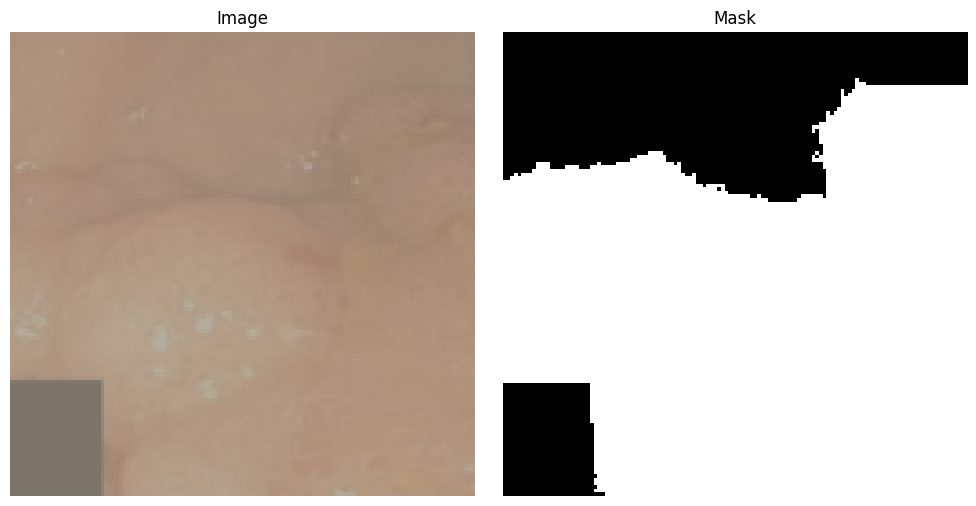

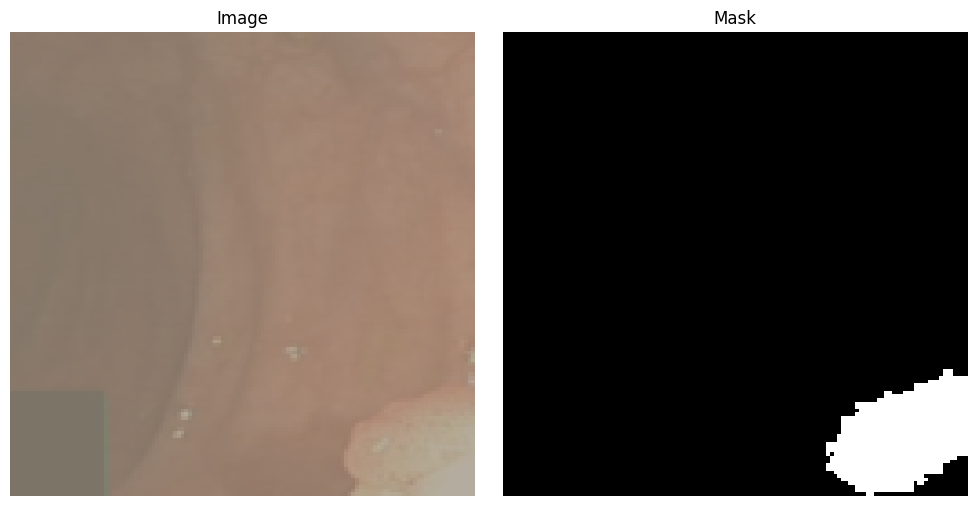

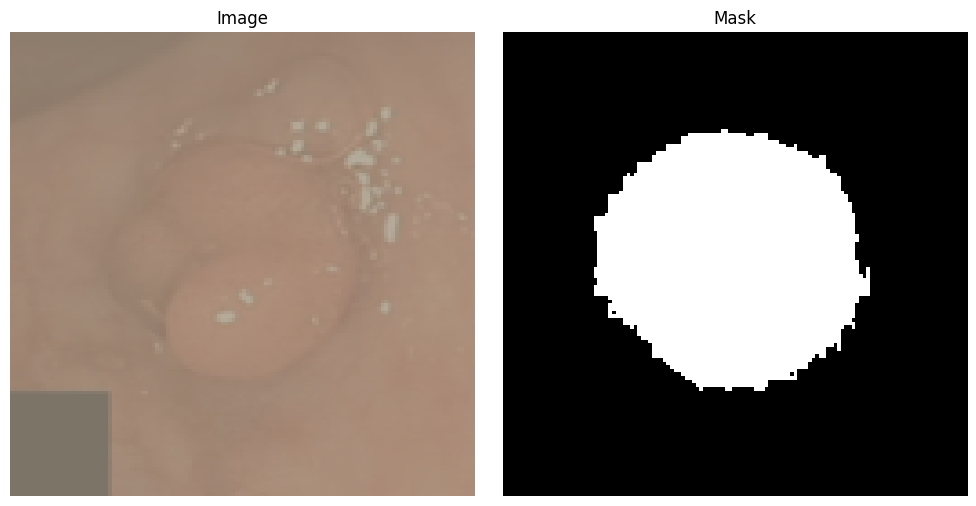

In [108]:
# страшные картинки :C Можно скрыть слева
import torch
import matplotlib.pyplot as plt
import numpy as np

def unnormalize(img, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)):
    mean = torch.tensor(mean).view(-1, 1, 1).to(img.device)
    std = torch.tensor(std).view(-1, 1, 1).to(img.device)
    img = img * std + mean
    return img.clamp(0, 1)

def visualize_dataset(dataset, num_samples=3):
    indices = np.random.choice(len(dataset), num_samples, replace=False)

    for idx in indices:
        image, mask = dataset[idx]
        image_unnorm = unnormalize(image)
        image_np = image_unnorm.permute(1, 2, 0).cpu().numpy()
        mask_np = mask.squeeze().cpu().numpy()

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(image_np)
        plt.title("Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(mask_np, cmap='gray')
        plt.title("Mask")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

visualize_dataset(val_dataset, num_samples=3)

---

# 2. Обучение бейзлайна

In [123]:
# Сама модель
model = smp.Unet(
    encoder_name="resnet34",
    encoder_weights="imagenet",
    in_channels=3,
    classes=1
)

model = model.to(device)

In [146]:
# Обучение плюс метрики
EPOCHS = 3
def compute_iou(preds, masks):
    intersection = (preds * masks).sum(dim=[1,2,3])
    union = preds.sum(dim=[1,2,3]) + masks.sum(dim=[1,2,3]) - intersection + 1e-6
    iou = (intersection + 1e-6) / union
    return iou.mean().item()

def pixel_accuracy(preds, masks):
    correct = (preds == masks).sum()
    total = torch.numel(preds)
    return (correct.float() / total).item()

def learn_model(model, train, test, crit_f, opt_f, epoch_num=3):
  for epoch in range(epoch_num):
    model.train()
    for images, targets in train:
        images, targets = images.to(device), targets.to(device)
        if targets.dim() == 3:
            targets = targets.unsqueeze(1)

        opt_f.zero_grad()
        outputs = model(images)
        loss = crit_f(outputs, targets)
        loss.backward()
        opt_f.step()

    print(f"Эпоха {epoch}")

    model.eval()
    all_val_preds = []
    all_val_masks = []
    val_loss = 0.0
    loss_val_f = smp.losses.DiceLoss(mode='binary')
    with torch.no_grad():
        for images, masks in test:
            images = images.to(device, non_blocking=True)
            masks = masks.to(device, non_blocking=True)
            if masks.dim() == 3:
                masks = masks.unsqueeze(1)
            with torch.amp.autocast('cuda'):
                outputs = model(images)
                loss = loss_val_f(outputs, masks)
            val_loss += loss.item() * images.size(0)
            with torch.amp.autocast('cuda'):
                preds = torch.sigmoid(outputs)
            preds = (preds > 0.5).float()
            all_val_preds.append(preds.cpu())
            all_val_masks.append(masks.cpu())

    epoch_val_loss = val_loss / len(test.dataset)
    all_val_preds = torch.cat(all_val_preds, dim=0)
    all_val_masks = torch.cat(all_val_masks, dim=0)
    val_acc = pixel_accuracy(all_val_preds, all_val_masks)
    val_iou = compute_iou(all_val_preds, all_val_masks)

    print(f"val loss: {epoch_val_loss:.3f}")
    print(f"val_accuracy: {val_acc:.3f}")
    print(f"val_iou: {val_iou:.3f}")

In [134]:
# Настраиваем для изменения весов модели
LEARNING_RATE = 0.001

criterion_unet = nn.CrossEntropyLoss()
optimizer_unet = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [135]:
# Обучаем бейзлайн
learn_model(model,
            train_loader,
            val_loader,
            criterion_unet, optimizer_unet)

Эпоха 0
val loss: 0.725
val_accuracy: 0.672
val_iou: 0.088
Эпоха 1
val loss: 0.725
val_accuracy: 0.672
val_iou: 0.089
Эпоха 2
val loss: 0.726
val_accuracy: 0.669
val_iou: 0.088


In [141]:
# Модель с mit_b0
mode_mit = smp.Unet(
    encoder_name="mit_b0",
    encoder_weights="imagenet",
    in_channels=3,
    classes=1
).to(device)

In [142]:
# изменятели параметров к ней
criterion_mit = nn.CrossEntropyLoss()
optimizer_mit = optim.Adam(mode_mit.parameters(), lr=LEARNING_RATE)

In [ ]:
# обучаем бейзлайн
learn_model(mode_mit,
            train_loader,
            val_loader,
            criterion_mit, optimizer_mit)

Эпоха 0


/Users/dmovchinnikov/.pyenv/versions/3.9.1/lib/python3.9/site-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


val loss: 0.653
val_accuracy: 0.476
val_iou: 0.207
Эпоха 1
val loss: 0.652
val_accuracy: 0.473
val_iou: 0.207
Эпоха 2
val loss: 0.650
val_accuracy: 0.467
val_iou: 0.209


Получили начальные бейзлайн

---

# 3. Улучшение бейзлайна 

Улучшаем увеличиванием эпох и уменьшением learning rate

In [147]:
model_imagenet_long = smp.Unet(
    encoder_name="resnet34",
    encoder_weights="imagenet",
    in_channels=3,
    classes=1
)

model_imagenet_long = model_imagenet_long.to(device)

LEARNING_RATE = 0.0001

criterion_unet_long = nn.CrossEntropyLoss()
optimizer_unet_long = optim.Adam(model_imagenet_long.parameters(), lr=LEARNING_RATE)
learn_model(model_imagenet_long,
            train_loader,
            val_loader,
            criterion_unet_long, optimizer_unet_long, epoch_num=5)

Эпоха 0


/Users/dmovchinnikov/.pyenv/versions/3.9.1/lib/python3.9/site-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


val loss: 0.616
val_accuracy: 0.323
val_iou: 0.243
Эпоха 1
val loss: 0.620
val_accuracy: 0.315
val_iou: 0.238
Эпоха 2
val loss: 0.616
val_accuracy: 0.315
val_iou: 0.237
Эпоха 3
val loss: 0.615
val_accuracy: 0.310
val_iou: 0.239
Эпоха 4
val loss: 0.614
val_accuracy: 0.315
val_iou: 0.240


In [149]:
mode_mit_long = smp.Unet(
    encoder_name="mit_b0",
    encoder_weights="imagenet",
    in_channels=3,
    classes=1
).to(device)

criterion_mit_long = nn.CrossEntropyLoss()
optimizer_mit_long = optim.Adam(mode_mit_long.parameters(), lr=LEARNING_RATE)

learn_model(mode_mit,
            train_loader,
            val_loader,
            criterion_mit_long, optimizer_mit_long, epoch_num=5)

Эпоха 0


/Users/dmovchinnikov/.pyenv/versions/3.9.1/lib/python3.9/site-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


val loss: 0.650
val_accuracy: 0.469
val_iou: 0.209
Эпоха 1
val loss: 0.651
val_accuracy: 0.469
val_iou: 0.207
Эпоха 2
val loss: 0.651
val_accuracy: 0.469
val_iou: 0.207
Эпоха 3
val loss: 0.650
val_accuracy: 0.468
val_iou: 0.210
Эпоха 4
val loss: 0.650
val_accuracy: 0.467
val_iou: 0.209


---

In [153]:
# Меняем функцию потерь

model_imagenet_loss = smp.Unet(
    encoder_name="resnet34",
    encoder_weights="imagenet",
    in_channels=3,
    classes=1
)

model_imagenet_loss = model_imagenet_loss.to(device)

LEARNING_RATE = 0.001

criterion_unet_loss = smp.losses.DiceLoss(mode='binary')
optimizer_unet_loss = optim.Adam(model_imagenet_loss.parameters(), lr=LEARNING_RATE)

learn_model(model_imagenet_loss,
            train_loader,
            val_loader,
            criterion_unet_loss, optimizer_unet_loss)

Эпоха 0


/Users/dmovchinnikov/.pyenv/versions/3.9.1/lib/python3.9/site-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


val loss: 0.532
val_accuracy: 0.509
val_iou: 0.300
Эпоха 1
val loss: 0.538
val_accuracy: 0.409
val_iou: 0.299
Эпоха 2
val loss: 0.528
val_accuracy: 0.457
val_iou: 0.312


In [154]:
# Аналогично меняем функцию потерь
mode_mit_loss = smp.Unet(
    encoder_name="mit_b0",
    encoder_weights="imagenet",
    in_channels=3,
    classes=1
).to(device)

criterion_mit_loss = smp.losses.DiceLoss(mode='binary')
optimizer_mit_loss = optim.Adam(mode_mit_loss.parameters(), lr=LEARNING_RATE)

learn_model(mode_mit_loss,
            train_loader,
            val_loader,
            criterion_mit_loss, optimizer_mit_loss)

Эпоха 0
val loss: 0.561
val_accuracy: 0.331
val_iou: 0.278
Эпоха 1
val loss: 0.666
val_accuracy: 0.757
val_iou: 0.177
Эпоха 2
val loss: 0.514
val_accuracy: 0.464
val_iou: 0.324


---

In [177]:
# Крутим, вертим, изменяем данные
MAX_SIZE = 200
import random
import torchvision.transforms.functional as TF
class GrossDatasetRand(Dataset):
    def __init__(self, image_dir, label_dir, image_size=(128, 128), isTrain=False):
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.image_size = image_size

        self.image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])[:MAX_SIZE]
        self.label_files = sorted([f for f in os.listdir(label_dir) if f.endswith('.jpg')])[:MAX_SIZE]

        self.transform = transforms.Compose([
            transforms.Lambda(lambda x: x.crop((150, 90, 406, 450))),
            transforms.Resize(image_size),
            transforms.ToTensor(),
        ])

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(self.image_dir, self.image_files[idx])
        mask_path = os.path.join(self.label_dir, self.label_files[idx])

        image = Image.open(image_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")

        if self.is_train:
            if random.random() > 0.5:
                image = TF.hflip(image)
                mask = TF.hflip(mask)
            
            if random.random() > 0.5:
                image = TF.vflip(image)
                mask = TF.vflip(mask)
            
            angle = random.uniform(-10, 10)
            image = TF.rotate(image, angle)
            mask = TF.rotate(mask, angle)
            
            brightness = random.uniform(0.8, 1.2)
            contrast = random.uniform(0.8, 1.2)
            image = TF.adjust_brightness(image, brightness)
            image = TF.adjust_contrast(image, contrast)

        if self.transform:
            image = self.transform(image)
        if self.transform:
            mask = self.transform(mask)
        else:
            mask = transforms.ToTensor()(mask)

        mask = (mask > 0).float()

        return image, mask

In [185]:
# Новое разбиение датасета
IMAGE_SIZE = (128, 128)

full_dataset_rand = GrossDatasetRand(
    image_dir="/Users/dmovchinnikov/.cache/kagglehub/datasets/abdallahwagih/kvasir-dataset-for-classification-and-segmentation/versions/1/kvasir-seg/Kvasir-SEG/images",
    label_dir="/Users/dmovchinnikov/.cache/kagglehub/datasets/abdallahwagih/kvasir-dataset-for-classification-and-segmentation/versions/1/kvasir-seg/Kvasir-SEG/masks",
    image_size=IMAGE_SIZE,
    isTrain=True
)

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
train_dataset_rand, valid_dataset_rand = train_test_split(full_dataset, test_size=0.2, random_state=42)

train_loader_rand = DataLoader(train_dataset_rand, batch_size=8, shuffle=True, num_workers=2)
val_loader_rand = DataLoader(valid_dataset_rand, batch_size=8, shuffle=False, num_workers=2)

In [186]:
# Обучение на новом датасете
model_imagenet_rand = smp.Unet(
    encoder_name="resnet34",
    encoder_weights="imagenet",
    in_channels=3,
    classes=1
)

model_imagenet_rand = model_imagenet_rand.to(device)

LEARNING_RATE = 0.001

criterion_unet_rand = nn.CrossEntropyLoss()
opt_unet_rand = optim.Adam(model_imagenet_rand.parameters(), lr=LEARNING_RATE)

learn_model(model_imagenet_rand,
            train_loader_rand,
            val_loader_rand,
            criterion_unet_rand, opt_unet_rand)

Эпоха 0


/Users/dmovchinnikov/.pyenv/versions/3.9.1/lib/python3.9/site-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


val loss: 0.714
val_accuracy: 0.632
val_iou: 0.086
Эпоха 1
val loss: 0.724
val_accuracy: 0.666
val_iou: 0.076
Эпоха 2
val loss: 0.730
val_accuracy: 0.667
val_iou: 0.075


In [187]:
# Обучение на новом датасете

mode_mit_rand = smp.Unet(
    encoder_name="mit_b0",
    encoder_weights="imagenet",
    in_channels=3,
    classes=1
).to(device)

criterion_mit_rand = nn.CrossEntropyLoss()
optimizer_mit_rand = optim.Adam(mode_mit_rand.parameters(), lr=LEARNING_RATE)

learn_model(mode_mit_rand,
            train_loader_rand,
            val_loader_rand,
            criterion_mit_rand, optimizer_mit_rand)

Эпоха 0


/Users/dmovchinnikov/.pyenv/versions/3.9.1/lib/python3.9/site-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


val loss: 0.665
val_accuracy: 0.532
val_iou: 0.171
Эпоха 1
val loss: 0.665
val_accuracy: 0.523
val_iou: 0.176
Эпоха 2
val loss: 0.665
val_accuracy: 0.524
val_iou: 0.176


Лучшими оказались с новым набором данных(измененные)

Думаю это из-за того, что объем выборки был не очень большим и заболевания могут очень сильно отличаться от стадии болезни.

---

# 4. Собственная имплементация

In [189]:
# Сверточная модель
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomUnt(nn.Module):
    def __init__(self, num_classes=1, dropout_prob=0.2):
        super(CustomUnt, self).__init__()
        def conv_block(in_channels, out_channels, dropout_prob=0.2):
            return nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
                nn.BatchNorm2d(out_channels),
                nn.ReLU(inplace=True),
                nn.Dropout(dropout_prob),
                nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
                nn.BatchNorm2d(out_channels),
                nn.ReLU(inplace=True),
                nn.Dropout(dropout_prob)
            )

        self.encoder1 = conv_block(3, 64, dropout_prob)
        self.encoder2 = conv_block(64, 128, dropout_prob)
        self.encoder3 = conv_block(128, 256, dropout_prob)
        self.pool = nn.MaxPool2d(2, 2)

        self.bottleneck = conv_block(256, 512, dropout_prob)

        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.decoder3 = conv_block(512, 256, dropout_prob)

        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.decoder2 = conv_block(256, 128, dropout_prob)

        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.decoder1 = conv_block(128, 64, dropout_prob)

        self.final_conv = nn.Conv2d(64, num_classes, kernel_size=1)

    def forward(self, x):
        e1 = self.encoder1(x)
        e2 = self.encoder2(self.pool(e1))
        e3 = self.encoder3(self.pool(e2))

        b = self.bottleneck(self.pool(e3))

        d3 = self.upconv3(b)
        if d3.shape != e3.shape:
            d3 = F.interpolate(d3, size=e3.shape[2:], mode='bilinear', align_corners=True)
        d3 = torch.cat((d3, e3), dim=1)
        d3 = self.decoder3(d3)

        d2 = self.upconv2(d3)
        if d2.shape != e2.shape:
            d2 = F.interpolate(d2, size=e2.shape[2:], mode='bilinear', align_corners=True)
        d2 = torch.cat((d2, e2), dim=1)
        d2 = self.decoder2(d2)

        d1 = self.upconv1(d2)
        if d1.shape != e1.shape:
            d1 = F.interpolate(d1, size=e1.shape[2:], mode='bilinear', align_corners=True)
        d1 = torch.cat((d1, e1), dim=1)
        d1 = self.decoder1(d1)

        out = self.final_conv(d1)

        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_custom = CustomUnt(num_classes=1, dropout_prob=0.2).to(device)

In [190]:
# Обучение сверточной модели
LEARNING_RATE = 0.001

criterion_unet_normal = nn.CrossEntropyLoss()
opt_unet_normal = optim.Adam(model_custom.parameters(), lr=LEARNING_RATE)

learn_model(model_custom,
            train_loader,
            val_loader,
            criterion_unet_normal, opt_unet_normal)

Эпоха 0


/Users/dmovchinnikov/.pyenv/versions/3.9.1/lib/python3.9/site-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


val loss: 0.661
val_accuracy: 0.737
val_iou: 0.051
Эпоха 1
val loss: 0.655
val_accuracy: 0.707
val_iou: 0.185
Эпоха 2
val loss: 0.652
val_accuracy: 0.675
val_iou: 0.229


In [191]:
# Улучшенная 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_custom_extra = CustomUnt(num_classes=1, dropout_prob=0.2).to(device)

criterion_unet_extra = nn.CrossEntropyLoss()
opt_unet_extra = optim.Adam(model_custom_extra.parameters(), lr=LEARNING_RATE)

learn_model(model_custom_extra,
            train_loader_rand,
            val_loader_rand,
            criterion_unet_extra, opt_unet_extra)

Эпоха 0


/Users/dmovchinnikov/.pyenv/versions/3.9.1/lib/python3.9/site-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


val loss: 0.654
val_accuracy: 0.305
val_iou: 0.260
Эпоха 1
val loss: 0.649
val_accuracy: 0.329
val_iou: 0.252
Эпоха 2
val loss: 0.649
val_accuracy: 0.338
val_iou: 0.244


In [217]:
# Трансформенная модель
import torch
import torch.nn as nn
import torch.nn.functional as F
from einops import rearrange, repeat
from torch import einsum

class PatchEmbedding(nn.Module):
    def __init__(self, patch_size=16, in_chans=3, embed_dim=384):
        super().__init__()
        self.patch_size = patch_size
        self.proj = nn.Conv2d(in_chans, embed_dim, kernel_size=patch_size, stride=patch_size)

    def forward(self, x):
        x = self.proj(x)
        x = rearrange(x, 'b e h w -> b (h w) e')
        return x

class Attention(nn.Module):
    def __init__(self, dim, num_heads=6):
        super().__init__()
        self.num_heads = num_heads
        self.scale = (dim // num_heads) ** -0.5
        
        self.to_qkv = nn.Linear(dim, dim * 3)
        self.to_out = nn.Linear(dim, dim)

    def forward(self, x):
        qkv = self.to_qkv(x).chunk(3, dim=-1)
        q, k, v = map(lambda t: rearrange(t, 'b n (h d) -> b h n d', h=self.num_heads), qkv)
        
        dots = einsum('b h i d, b h j d -> b h i j', q, k) * self.scale
        attn = dots.softmax(dim=-1)
        
        out = einsum('b h i j, b h j d -> b h i d', attn, v)
        out = rearrange(out, 'b h n d -> b n (h d)')
        return self.to_out(out)

class TransformerBlock(nn.Module):
    def __init__(self, dim, num_heads=6, mlp_dim=1536):
        super().__init__()
        self.norm1 = nn.LayerNorm(dim)
        self.attn = Attention(dim, num_heads)
        self.norm2 = nn.LayerNorm(dim)
        self.mlp = nn.Sequential(
            nn.Linear(dim, mlp_dim),
            nn.GELU(),
            nn.Linear(mlp_dim, dim)
        )

    def forward(self, x):
        x = x + self.attn(self.norm1(x))
        x = x + self.mlp(self.norm2(x))
        return x

class SimpleSegmenter(nn.Module):
    def __init__(self, n_classes=32, img_size=224, patch_size=16):
        super().__init__()
        self.img_size = img_size
        self.patch_size = patch_size
        self.embed_dim = 384
        self.num_patches = (img_size // patch_size) ** 2
        
        self.patch_embed = PatchEmbedding(patch_size, 3, self.embed_dim)
        self.pos_embed = nn.Parameter(torch.randn(1, self.num_patches, self.embed_dim))
        
        self.blocks = nn.Sequential(
            *[TransformerBlock(self.embed_dim) for _ in range(4)]
        )
        
        self.decoder = nn.Sequential(
            nn.LayerNorm(self.embed_dim),
            nn.Linear(self.embed_dim, n_classes)
        )
        
    def forward(self, x):
        B, C, H, W = x.shape
        
        x = self.patch_embed(x)
        if x.shape[1] != self.pos_embed.shape[1]:
            H_p, W_p = H // self.patch_size, W // self.patch_size
            pos_embed_resized = F.interpolate(
                self.pos_embed.reshape(1, int(self.num_patches ** 0.5), int(self.num_patches ** 0.5), -1).permute(0, 3, 1, 2),
                size=(H_p, W_p),
                mode='bilinear',
                align_corners=False
            ).permute(0, 2, 3, 1).reshape(1, -1, self.embed_dim)
            x = x + pos_embed_resized
        else:
            x = x + self.pos_embed
        
        x = self.blocks(x)
        
        x = rearrange(x, 'b (h w) c -> b c h w', h=H//self.patch_size, w=W//self.patch_size)
        x = F.interpolate(x, size=(H, W), mode='bilinear', align_corners=False)
        
        x = x.permute(0, 2, 3, 1)
        x = self.decoder(x)
        return x.permute(0, 3, 1, 2)

In [218]:
# Делаем больше картинки
MAX_SIZE = 200
import random
import torchvision.transforms.functional as TF
class GrossDatasetBig(Dataset):
    def __init__(self, image_dir, label_dir, image_size=(128, 128), isTrain=False):
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.image_size = image_size

        self.image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])[:MAX_SIZE]
        self.label_files = sorted([f for f in os.listdir(label_dir) if f.endswith('.jpg')])[:MAX_SIZE]

        self.transform = transforms.Compose([
            transforms.Lambda(lambda x: x.crop((150, 90, 406, 450))),
            transforms.Resize(image_size),
            transforms.ToTensor(),
        ])

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(self.image_dir, self.image_files[idx])
        mask_path = os.path.join(self.label_dir, self.label_files[idx])

        image = Image.open(image_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")

        if self.is_train:
            if random.random() > 0.5:
                image = TF.hflip(image)
                mask = TF.hflip(mask)
            
            if random.random() > 0.5:
                image = TF.vflip(image)
                mask = TF.vflip(mask)
            
            angle = random.uniform(-10, 10)
            image = TF.rotate(image, angle)
            mask = TF.rotate(mask, angle)
            
            brightness = random.uniform(0.8, 1.2)
            contrast = random.uniform(0.8, 1.2)
            image = TF.adjust_brightness(image, brightness)
            image = TF.adjust_contrast(image, contrast)

        if self.transform:
            image = self.transform(image)
        if self.transform:
            mask = self.transform(mask)
        else:
            mask = transforms.ToTensor()(mask)

        mask = (mask > 0).float()

        return image, mask
    

IMAGE_SIZE = (224, 224)

full_dataset_big = GrossDatasetBig(
    image_dir="/Users/dmovchinnikov/.cache/kagglehub/datasets/abdallahwagih/kvasir-dataset-for-classification-and-segmentation/versions/1/kvasir-seg/Kvasir-SEG/images",
    label_dir="/Users/dmovchinnikov/.cache/kagglehub/datasets/abdallahwagih/kvasir-dataset-for-classification-and-segmentation/versions/1/kvasir-seg/Kvasir-SEG/masks",
    image_size=IMAGE_SIZE,
    isTrain=False
)

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
train_dataset_big, valid_dataset_big = train_test_split(full_dataset, test_size=0.2, random_state=42)

train_loader_big = DataLoader(train_dataset_big, batch_size=8, shuffle=True, num_workers=2)
val_loader_big = DataLoader(valid_dataset_big, batch_size=8, shuffle=False, num_workers=2)

In [ ]:
# Обучение трансформенной
model_custom_segmenter = SimpleSegmenter(n_classes=1).to(device)

criterion_custom_transformer = nn.CrossEntropyLoss()
optimizer_custom_transformer = optim.Adam(model_custom_segmenter.parameters(), lr=LEARNING_RATE)

learn_model(model_custom_segmenter,
            train_loader_big,
            val_loader_big,
            criterion_custom_transformer, optimizer_custom_transformer)

Эпоха 0


/Users/dmovchinnikov/.pyenv/versions/3.9.1/lib/python3.9/site-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


val loss: 0.624
val_accuracy: 0.301
val_iou: 0.265
Эпоха 1
val loss: 0.624
val_accuracy: 0.301
val_iou: 0.265
Эпоха 2
val loss: 0.624
val_accuracy: 0.301
val_iou: 0.265


In [ ]:
# Улучшенная трансформенная
model_custom_transformer_extra = SimpleSegmenter(n_classes=1).to(device)

criterion_custom_transformer = nn.CrossEntropyLoss()
optimizer_custom_transformer = optim.Adam(model_custom_transformer_extra.parameters(), lr=LEARNING_RATE)

learn_model(model_custom_transformer_extra,
            train_loader_rand,
            val_loader_rand,
            criterion_custom_transformer, optimizer_custom_transformer)

Эпоха 0


/Users/dmovchinnikov/.pyenv/versions/3.9.1/lib/python3.9/site-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


val loss: 0.720
val_accuracy: 0.682
val_iou: 0.038
Эпоха 1
val loss: 0.720
val_accuracy: 0.682
val_iou: 0.038
Эпоха 2
val loss: 0.720
val_accuracy: 0.682
val_iou: 0.038


| Модель                                                        | **Acc** | **IoU** |
| ------------------------------------------------------------- | :---------: | :---------: |
| resnet34                                                          |    0.669    |    0.088    |
| mit_b0                                   |  0.467  |  0.209  |
| resnet34(эпохи + lr)                                              |    0.315    |     0.240    |
| mit_b0 (эпохи + lr)                                  |  0.467  |  0.209  |
| resnet34(Функция loss)                                              |     0.457    |     0.312    |
| mit_b0 (Функция loss)                                  |  0.464  |  0.324  |
| своя сверточная                                              |     0.675    |     0.229    |
| своя сверточная (эпохи + lr)                                  |  0.338  |  0.244  |
| своя трансформер                                             |     0.301    |     0.265    |
| своя трансформер (эпохи + lr)                                  |  0.682  |  0.038  |

Как итог Полуились достаточно интересные данные. Лучший результат в 0.324 говорит о том, что достаточно сложно находить в желудке заболевания. Это была интересная работа, но думаю так как фото из желудка, то возможности камеры ограничены, сами заболевания не всегда сильно отличаются от того, что внутри.  

Как доп возможность перепроверки интересно, но пока это можно использовать как триггер для врача. Однако стоит ему доверять больше на этом этапе.